# OpenAI Gym 入門

- [OpenAI Gym 公式ホームページ](https://gym.openai.com/)
- [OpenAI Gym 公式ドキュメント](https://gym.openai.com/docs)　← このノートブックはこの公式ドキュメントの日本語訳＋α
- [OpenAI Gym GitHub](https://github.com/openai/gym)
- [OpenAI Gym で提供されている全環境](https://gym.openai.com/envs)
- [OpenAI Gym 公開についての公式ブログ](https://openai.com/blog/openai-gym-beta/) 2016/04/27
- [OpenAI Universe](https://universe.openai.com/)

### OpenAI Gymとは？

- OpenAI Gymは強化学習アルゴリズムを作ったり、比較したりするためのツール
- エージェントはどんな構造でも良い
- TensorFlowやTheanoで書いてもオッケー
- 今はPythonのみだが、将来的には他の言語もサポートする予定

### OpenAI Gymは２つの部分から成る

1. **gym** というオープンソースライブラリ。強化学習における「環境」を提供する
2. **OpenAI Gym** とういウェブサービス。APIを使い、自分の作ったエージェントの良さを他のユーザーと比較できる

## 環境とのインタラクション

### Step 1: 手動で行動選択（version 1）

'CartPole-v0' という環境に対して、手動で選んだ行動を入れてみる。

In [2]:
# gym オープンソースライブラリの読み込み
import gym

In [3]:
# 環境を作る
env = gym.make('CartPole-v0')    # 'CartPole-v0' は環境ID
#env = gym.make('MountainCar-v0')    # 'MountainCar-v0'という別の環境
#env = gym.make('MsPacman-v0')    # 'MsPacman-v0'という別の環境

env.seed(42)

[2017-01-18 23:15:36,839] Making new env: CartPole-v0


[0L]

In [3]:
# 環境の初期化（最初の観測が得られる）
env.reset()

array([-0.00808208, -0.02773516,  0.02830284, -0.03498637])

In [4]:
# 描画
env.render()

In [5]:
# 行動選択（手動）
action = 0   # 0: Left, 1: Right

# 環境に対して選択された行動を実行
# printで囲む
env.step(action)

# 描画
env.render()

In [6]:
# 画面を閉じる
env.render(close=True) 

### Step 2: ランダムな行動選択（ランダム方策）

'CartPole-v0' という環境に対して、ランダムな行動を取ってみる（1000ステップ）。

In [7]:
import time

In [8]:
# gym オープンソースライブラリの読み込み
import gym

In [9]:
# 環境を作る
env = gym.make('CartPole-v0')    # 'CartPole-v0' は環境ID
#env = gym.make('MountainCar-v0')    # 'MountainCar-v0'という別の環境
#env = gym.make('MsPacman-v0')    # 'MsPacman-v0'という別の環境

[2017-01-18 13:50:34,453] Making new env: CartPole-v0


In [10]:
# ランダムな行動選択
env.action_space.sample()

0

In [11]:
# 行動空間（エージェントが選択可能な行動が定義されている空間）
env.action_space

Discrete(2)

In [12]:
# 環境の初期化（最初の観測が得られる）
env.reset()

array([-0.04154346, -0.00285351, -0.03092677,  0.0460129 ])

In [13]:
for _ in range(100):
    time.sleep(0.1)    # 描画を遅くするために0.1秒スリープ
    env.render()    # 描画
    action = env.action_space.sample()    # ランダムな行動選択
    print(action), # 選択された行動をプリント
    print(env.step(action))    # 選択行動を実行

1 (array([-0.04160053,  0.19269795, -0.03000651, -0.25626504]), 1.0, False, {})
1 (array([-0.03774657,  0.38823518, -0.03513181, -0.55825944]), 1.0, False, {})
0 (array([-0.02998187,  0.19362354, -0.046297  , -0.27684874]), 1.0, False, {})
1 (array([-0.0261094 ,  0.38937437, -0.05183397, -0.58376682]), 1.0, False, {})
1 (array([-0.01832191,  0.58518268, -0.06350931, -0.89231717]), 1.0, False, {})
1 (array([-0.00661826,  0.78110596, -0.08135565, -1.20426879]), 1.0, False, {})
1 (array([ 0.00900386,  0.97717979, -0.10544103, -1.52129894]), 1.0, False, {})
1 (array([ 0.02854746,  1.17340607, -0.13586701, -1.84494592]), 1.0, False, {})
1 (array([ 0.05201558,  1.36973929, -0.17276593, -2.17655384]), 1.0, False, {})
1 (array([ 0.07941037,  1.56607088, -0.216297  , -2.51720794]), 1.0, True, {})


[2017-01-18 13:50:35,651] You are calling 'step()' even though this environment has already returned done = True. You should always call 'reset()' once you receive 'done = True' -- any further steps are undefined behavior.


0 (array([ 0.11073178,  1.37327814, -0.26664116, -2.2978539 ]), 0.0, True, {})
0 (array([ 0.13819735,  1.18141885, -0.31259824, -2.09770191]), 0.0, True, {})
1 (array([ 0.16182572,  1.37805651, -0.35455228, -2.46877854]), 0.0, True, {})
0 (array([ 0.18938685,  1.18722244, -0.40392785, -2.30239981]), 0.0, True, {})
0 (array([ 0.2131313 ,  0.99739649, -0.44997585, -2.15612718]), 0.0, True, {})
0 (array([ 0.23307923,  0.80853294, -0.49309839, -2.02890523]), 0.0, True, {})
0 (array([ 0.24924989,  0.62057153, -0.53367649, -1.91971783]), 0.0, True, {})
0 (array([ 0.26166132,  0.43344484, -0.57207085, -1.82761821]), 0.0, True, {})
1 (array([ 0.27033022,  0.6291339 , -0.60862321, -2.23357993]), 0.0, True, {})
0 (array([ 0.2829129 ,  0.44242225, -0.65329481, -2.1718936 ]), 0.0, True, {})
1 (array([ 0.29176134,  0.6364248 , -0.69673268, -2.5816705 ]), 0.0, True, {})
1 (array([ 0.30448984,  0.82864053, -0.74836609, -2.99146255]), 0.0, True, {})
0 (array([ 0.32106265,  0.6410831 , -0.80819535, -2.

In [14]:
env.render(close=True) # 画面を閉じる

### Step 3: 手動で行動選択（version 2）


- https://github.com/openai/gym/blob/master/examples/agents/keyboard_agent.py

注： line36: `env.render()`の前に`env.reset()`を入れると、ほとんどの環境で使用可能。

In [15]:
#!python keyboard_agent.py CartPole-v1
#!python keyboard_agent.py LunarLander-v2
#!python keyboard_agent.py MountainCar-v0
#!python keyboard_agent.py SpaceInvaders-v0
#!python keyboard_agent.py Breakout-v0
#!python keyboard_agent.py Acrobot-v1

## 観測

- ランダムな行動より上手くやりたければ、それぞれの行動が環境にどんな影響を与えるのか知りたいところ。
- 行動が環境にどんな影響を与えたのかは、環境の`step`関数が教えてくれる。
- step関数は4つの値を返す
  1. observation (object) 観測
  1. reward  (float) 報酬
  1. done (boolean) エピソードの終了フラグ（Trueになった時がreset()を呼ぶタイミング）
  1. info (dict) サブ情報

done==Trueとなったときにエピソードを終了するのであれば、以下のようなコードになる。

In [16]:
import numpy as np
np.set_printoptions(suppress=True)    # Scientific Notation (例 1.0e-0.5)を使わない

In [17]:
all_obs = []

import gym
env = gym.make('CartPole-v0')
for i_episode in range(5):    # 5エピソード回す
    observation = env.reset()    # 環境を初期化し、最初の観測を得る。
    all_obs.append(observation)    # 観測を記録
    for t in range(100):    # 各エピソードの最大ステップ数は100
        env.render()
        print(observation)
        action = env.action_space.sample()    # ランダム方策
        observation, reward, done, info = env.step(action)    # 選択行動の実行
        all_obs.append(observation)    # 観測を記録        
        if done:
            print("Episode finished after {} timesteps\n".format(t+1))
            break

[2017-01-18 13:50:44,875] Making new env: CartPole-v0


[ 0.02459009  0.02267429  0.00733899  0.03650138]
[ 0.02504358 -0.17255213  0.00806902  0.33149077]
[ 0.02159254 -0.367788    0.01469883  0.62670731]
[ 0.01423678 -0.17287427  0.02723298  0.3386896 ]
[ 0.01077929 -0.36837294  0.03400677  0.63983436]
[ 0.00341183 -0.5639521   0.04680346  0.94302955]
[-0.00786721 -0.75967236  0.06566405  1.25004364]
[-0.02306066 -0.56545057  0.09066492  0.97863018]
[-0.03436967 -0.37165342  0.11023752  0.7157474 ]
[-0.04180274 -0.56811459  0.12455247  1.0409946 ]
[-0.05316503 -0.3748474   0.14537236  0.78986339]
[-0.06066198 -0.57163462  0.16116963  1.12451976]
[-0.07209467 -0.76845932  0.18366003  1.46310961]
Episode finished after 13 timesteps

[ 0.01031005 -0.01777533 -0.02391008  0.0479302 ]
[ 0.00995455 -0.21254641 -0.02295148  0.33297442]
[ 0.00570362 -0.40733429 -0.01629199  0.61833215]
[-0.00244307 -0.2119886  -0.00392535  0.32056287]
[-0.00668284 -0.40705443  0.00248591  0.61200531]
[-0.01482393 -0.21196731  0.01472602  0.32010639]
[-0.01906327 

In [18]:
env.render(close=True)

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

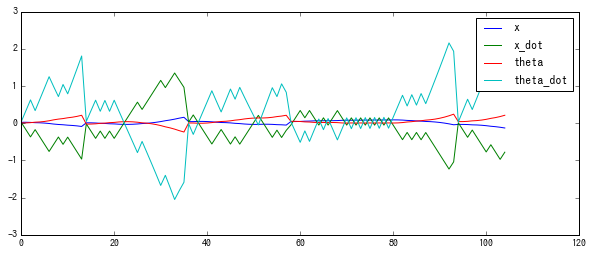

In [20]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(np.array(all_obs))
ax.legend(['x', 'x_dot', 'theta', 'theta_dot'])

## 空間

可能な行動や観測は [`Space`](https://github.com/openai/gym/blob/master/gym/core.py)オブジェクトで記述されている。

In [21]:
import gym
env = gym.make('CartPole-v0')    # 'CartPole-v0' は環境ID
#env = gym.make('MountainCar-v0')    # 'MountainCar-v0'という別の環境
#env = gym.make('MsPacman-v0')    # 'MsPacman-v0'という別の環境

[2017-01-18 13:50:47,968] Making new env: CartPole-v0


In [22]:
print(env.action_space)

Discrete(2)


In [23]:
print(env.observation_space)

Box(4,)


- [Descrete](https://github.com/openai/gym/blob/master/gym/spaces/discrete.py): 非負の整数 {0, 1, 2, ..., n-1}


In [24]:
env.action_space.n

2

- [Box](https://github.com/openai/gym/blob/master/gym/spaces/box.py): n次元のbox (次元ごとに上限と下限を持つn次元配列)

In [25]:
env.observation_space.high

array([  4.80000000e+00,   3.40282347e+38,   4.18879020e-01,
         3.40282347e+38])

In [26]:
env.observation_space.low

array([ -4.80000000e+00,  -3.40282347e+38,  -4.18879020e-01,
        -3.40282347e+38])

スペースからサンプリングすることも、ある値がスペースに含まれているか調べることもできる。

In [27]:
from gym import spaces

In [28]:
space = spaces.Discrete(8) #  {0, 1, 2, ..., 7}

In [29]:
# サンプリング
x = space.sample()
x

2

In [30]:
assert space.contains(x)

In [31]:
assert space.n == 8

## 環境

- `gym`の主な役割は、強化学習で使える多様な環境を提供すること。
- OpenAI Gymが提供する環境　https://gym.openai.com/envs

In [32]:
from gym import envs

In [33]:
# 使用可能な環境を列挙
envs.registry.all()

[EnvSpec(PredictActionsCartpole-v0),
 EnvSpec(Asteroids-ramDeterministic-v0),
 EnvSpec(Asteroids-ramDeterministic-v3),
 EnvSpec(Gopher-ramDeterministic-v3),
 EnvSpec(Gopher-ramDeterministic-v0),
 EnvSpec(DoubleDunk-ramDeterministic-v3),
 EnvSpec(DoubleDunk-ramDeterministic-v0),
 EnvSpec(Tennis-ramNoFrameskip-v3),
 EnvSpec(RoadRunner-ramDeterministic-v0),
 EnvSpec(Robotank-ram-v3),
 EnvSpec(CartPole-v0),
 EnvSpec(CartPole-v1),
 EnvSpec(Gopher-ram-v3),
 EnvSpec(Gopher-ram-v0),
 EnvSpec(Pooyan-ram-v0),
 EnvSpec(Pooyan-ram-v3),
 EnvSpec(SpaceInvaders-ram-v3),
 EnvSpec(CarRacing-v0),
 EnvSpec(SpaceInvaders-ram-v0),
 EnvSpec(YarsRevenge-ramDeterministic-v0),
 EnvSpec(SpaceInvadersDeterministic-v0),
 EnvSpec(DoubleDunk-ram-v3),
 EnvSpec(DoubleDunk-ram-v0),
 EnvSpec(SpaceInvadersDeterministic-v3),
 EnvSpec(Centipede-v3),
 EnvSpec(Centipede-v0),
 EnvSpec(Pitfall-ramNoFrameskip-v3),
 EnvSpec(Pitfall-ramNoFrameskip-v0),
 EnvSpec(Frostbite-ramNoFrameskip-v0),
 EnvSpec(Phoenix-ram-v3),
 EnvSpec(Ami

自分で環境を作ることも可能

- 作った環境はロードするときに[このように](https://github.com/openai/gym/blob/master/gym/envs/__init__.py)registryに登録したら良い。

## シミュレーション結果の記録とアップロード

ある環境でのパフォーマンスを計測し、同時にビデオに記録するには、環境（env）をMonitorでラッピングすれば良い。

In [34]:
import gym
from gym import wrappers    # ラッパの呼び出し
env = gym.make('CartPole-v0')
env = wrappers.Monitor(env, './cartpole-v0-experiment-1', force=True)  # envをMonitorでラッピング。force=Trueで前の結果を削除。
for i_episode in range(10):
    observation = env.reset()
    for t in range(100):
        env.render()
        print(observation)
        action = env.action_space.sample()
        observation, reward, done, info = env.step(action)
        if done:
            print("Episode finished after {} timesteps".format(t+1))
            break
            
env.render(close=True)

[2017-01-18 13:50:48,084] Making new env: CartPole-v0
[2017-01-18 13:50:48,091] DEPRECATION WARNING: env.spec.timestep_limit has been deprecated. Replace your call to `env.spec.timestep_limit` with `env.spec.tags.get('wrapper_config.TimeLimit.max_episode_steps')`. This change was made 12/28/2016 and is included in version 0.7.0
[2017-01-18 13:50:48,092] Clearing 8 monitor files from previous run (because force=True was provided)
[2017-01-18 13:50:48,094] Starting new video recorder writing to /Users/otsuka/git/pydata.okinawa/meetup021_main/3_openai_gym/cartpole-v0-experiment-1/openaigym.video.0.17434.video000000.mp4


[ 0.01426023 -0.01140579  0.04470146 -0.04862813]
[ 0.01403212  0.18304762  0.0437289  -0.32687902]
[ 0.01769307 -0.01266874  0.03719132 -0.02073292]
[ 0.01743969 -0.20830378  0.03677666  0.28344843]
[ 0.01327362 -0.01372515  0.04244563  0.00258774]
[ 0.01299912  0.18076318  0.04249738 -0.27640672]
[ 0.01661438 -0.0149385   0.03696925  0.02937122]
[ 0.01631561 -0.21057057  0.03755667  0.33348531]
[ 0.0121042  -0.40620638  0.04422638  0.63777115]
[ 0.00398007 -0.21172814  0.0569818   0.35933736]
[-0.00025449 -0.01746056  0.06416855  0.08515252]
[-0.0006037  -0.21344084  0.0658716   0.39737053]
[-0.00487252 -0.40943248  0.07381901  0.71007265]


[2017-01-18 13:50:48,917] Starting new video recorder writing to /Users/otsuka/git/pydata.okinawa/meetup021_main/3_openai_gym/cartpole-v0-experiment-1/openaigym.video.0.17434.video000001.mp4


[-0.01306117 -0.60549495  0.08802046  1.02504851]
[-0.02517107 -0.80167169  0.10852143  1.34401905]
[-0.0412045  -0.99797843  0.13540181  1.66858966]
[-0.06116407 -0.80466577  0.16877361  1.42096131]
[-0.07725739 -1.00142538  0.19719283  1.76129145]
Episode finished after 18 timesteps
[-0.04992798  0.03723891  0.03524338 -0.00555281]
[-0.0491832  -0.1583703   0.03513232  0.2980382 ]
[-0.0523506  -0.35397498  0.04109309  0.60159095]
[-0.0594301  -0.54964693  0.05312491  0.90692907]
[-0.07042304 -0.35528293  0.07126349  0.63140575]
[-0.0775287  -0.16122384  0.0838916   0.36198968]
[-0.08075318  0.03261175  0.0911314   0.09689404]
[-0.08010094 -0.16369014  0.09306928  0.41688058]
[-0.08337474 -0.35999933  0.10140689  0.73739286]
[-0.09057473 -0.16641321  0.11615475  0.478268  ]
[-0.093903    0.02689374  0.12572011  0.22433419]
[-0.09336512  0.2200156   0.13020679 -0.0261979 ]
[-0.08896481  0.4130532   0.12968283 -0.2751305 ]
[-0.08070374  0.21634245  0.12418022  0.05547792]
[-0.0763769   

[2017-01-18 13:50:51,966] Starting new video recorder writing to /Users/otsuka/git/pydata.okinawa/meetup021_main/3_openai_gym/cartpole-v0-experiment-1/openaigym.video.0.17434.video000008.mp4


[-0.01078491 -0.01191037 -0.04722849 -0.01581334]
[-0.01102311  0.18385596 -0.04754476 -0.32301542]
[-0.00734599 -0.01055786 -0.05400507 -0.04569712]
[-0.00755715  0.18529523 -0.05491901 -0.35491823]
[-0.00385125 -0.00900459 -0.06201737 -0.08004597]
[-0.00403134  0.18694904 -0.06361829 -0.39163277]
[-0.00029236  0.38291344 -0.07145095 -0.70367589]
[ 0.00736591  0.1888506  -0.08552447 -0.43431308]
[ 0.01114292 -0.00496302 -0.09421073 -0.16976878]
[ 0.01104366  0.19137229 -0.0976061  -0.49062276]
[ 0.01487111  0.38772586 -0.10741856 -0.81240188]
[ 0.02262563  0.19422633 -0.1236666  -0.5553459 ]
[ 0.02651015  0.39084779 -0.13477351 -0.88429108]
[ 0.03432711  0.58751696 -0.15245933 -1.21612324]
[ 0.04607745  0.78424055 -0.1767818  -1.55243541]
[ 0.06176226  0.98098658 -0.20783051 -1.89465851]
Episode finished after 16 timesteps
[ 0.01674005 -0.02430572 -0.04798115 -0.02958559]
[ 0.01625393  0.1714703  -0.04857286 -0.33701269]
[ 0.01968334 -0.02292798 -0.05531311 -0.06003399]
[ 0.01922478 -

In [35]:
#!open .

In [36]:
# 結果をOpenAI Gym側のサーバーにアップロードする方法。

import gym
#gym.upload('/tmp/cartpole-v0-experiment-1', api_key='YOUR_API_KEY')

## パフォーマンス評価

gistに再現方法を書き、世界のみんなとシェアすれば完成。

- https://gym.openai.com/envs/CartPole-v0
- https://gym.openai.com/envs/LunarLander-v2

## レビュー

- 実装した手法がコミュニティにとって有用な感じであれば、コミュニティメンバーにレビューしてもらうことも可能。
